In [2]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import mmcv
from mmcv import Config
from mmdet.datasets.utils import get_dataset
from PIL import Image


mean=[123.675, 116.28, 103.53]
std=[58.395, 57.12, 57.375]

image_dir = 'data/dataset/images'
filenames = os.listdir(image_dir)

cfg = Config.fromfile('configs/baseline.py')
ds = get_dataset(cfg.data.train)

In [3]:
def restore_img(img):
    img = img.copy()
    # from (c, h, w) to (h, w, c)
    img = np.transpose(img, (1, 2, 0))
    # float to uint8
    img = img * std + mean
    img = img.astype('uint8')
    return img

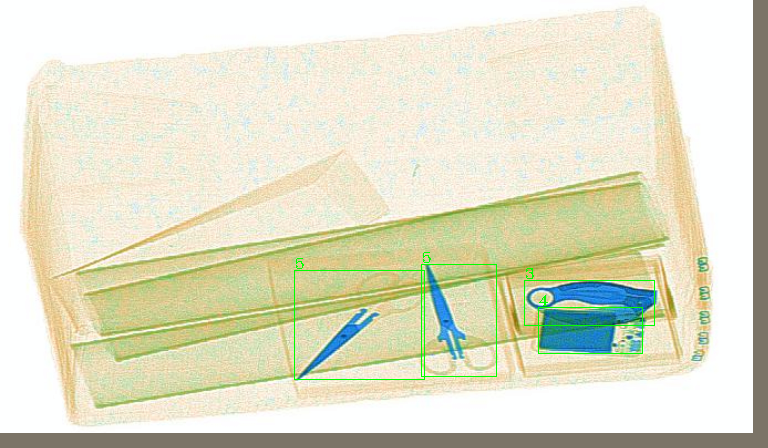

In [7]:
data = ds[0]
img = data['img'].data.numpy()
img = restore_img(img)
gt_bboxes = data['gt_bboxes'].data.numpy()
gt_labels = data['gt_labels'].data.numpy()

mmcv.imshow_det_bboxes(Image.fromarray(img), gt_bboxes, gt_labels)